In [1]:
import os
from pprint import pprint
import json

# Run_types
U listu run_types spremi sva imena fileova koja ce se koristiti

In [2]:
run_types = ["baseline", "always_A", "always_B", "always_C", "always_D"]

In [3]:
def contain_string(string):
    def f(x):
        return string in x
    return f

In [4]:
def get_files_in_dir(directory_path):
    files_list = []
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            file_path = os.path.join(root, file)
            files_list.append(file_path)
    return files_list

In [5]:
def load_file_results(file_path, accuracy_type=None):
    if accuracy_type is None:
        accuracy_type = 'over_all accuracy'
    with open(file_path, 'r') as file:
        content = file.read()
    
    # Find the start of the JSON content
    json_start = content.find("{")
    
    if json_start == -1:
        raise ValueError("No JSON content found in file.")
    
    # Extract and parse the JSON content
    json_content = content[json_start:]
    data = json.loads(json_content)
    
    accuracies = {
        'sentence': data['sentence'][accuracy_type],
        'wordplay': data['wordplay'][accuracy_type],
        'all': data['all'][accuracy_type]
    }
    return accuracies

# load_file_results("llama-instruct/Meta-Llama-3-8B-Instruct_dem1-spec_1.txt")

In [6]:
def load_models(models, accuracy_type=None, skip_spec=False):
    models_dict = {}
    for model_dir in models:
        models_dict[model_dir] = {}
        if not skip_spec:
            models_dict[model_dir+"_spec"] = {}
        files_list = get_files_in_dir(model_dir)
        for file in files_list:
            results = load_file_results(file, accuracy_type)
            file_dir = model_dir
            if "spec_" in file:
                file_dir += "_spec"
                if skip_spec:
                    continue
            for run_type in run_types:
                if run_type in file:
                    models_dict[file_dir][run_type] = results
    return models_dict

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def plot_accuracies(models, accuracy_group='sentence', accuracy_type=None, skip_spec=False):
    """
    Plots the accuracies as a bar plot.
    
    Parameters:
    results (dict): A dictionary with filenames as keys and extracted accuracies as values.
    accuracy_group (str): The type of accuracy to plot ('sentence' or 'wordplay').
    accuracy_type (str): The type of accuracy to plot ('over_all accuracy' or 'original_accuracy'...).
    """
    results = load_models(models, accuracy_type, skip_spec)
    models = list(results.keys())
    
    x = np.arange(len(models))  # the label locations
    width = 0.15  # the width of the bars

    fig, ax = plt.subplots(figsize=(12, 7))
    plt.grid()
    ax.set_ylim([0, 1])
    
    # for i, run_type in enumerate(run_types):
    #     col = []
    #     for model in models:
    #         if run_type in results[model]:
    #             col.append(results[model][run_type][accuracy_group])
    #         else:
    #             col.append(0)
    #     ax.bar(x + (i-2.5)*width, col, width, label=run_type)

    # ax.set_xlabel('Models')
    # accuracy_text = f'{accuracy_group.capitalize()} {accuracy_type.capitalize() if accuracy_type is not None else "Accuracies"}'
    # ax.set_ylabel(accuracy_text)
    # ax.set_title(f'{accuracy_text} by Model and Prompt')
    # ax.set_xticks(x)
    # ax.set_xticklabels(models, rotation=45, ha='right')
    # ax.legend()

    # fig.tight_layout()
    # plt.show()

    x = np.arange(len(run_types))
    for i, model in enumerate(models):
        col = []
        for run_type in run_types:
            if run_type in results[model]:
                col.append(results[model][run_type][accuracy_group])
            else:
                col.append(0)
        ax.bar(x + (i-2.5)*width, col, width, label=model)

    ax.set_xlabel('Run types')
    accuracy_text = f'{accuracy_group.capitalize()} {accuracy_type.capitalize() if accuracy_type is not None else "Accuracies"}'
    ax.set_ylabel(accuracy_text)
    ax.set_title(f'{accuracy_text} by Model')
    ax.set_xticks(x)
    ax.set_xticklabels(run_types, rotation=45, ha='right')
    ax.legend()

    fig.tight_layout()
    plt.show()



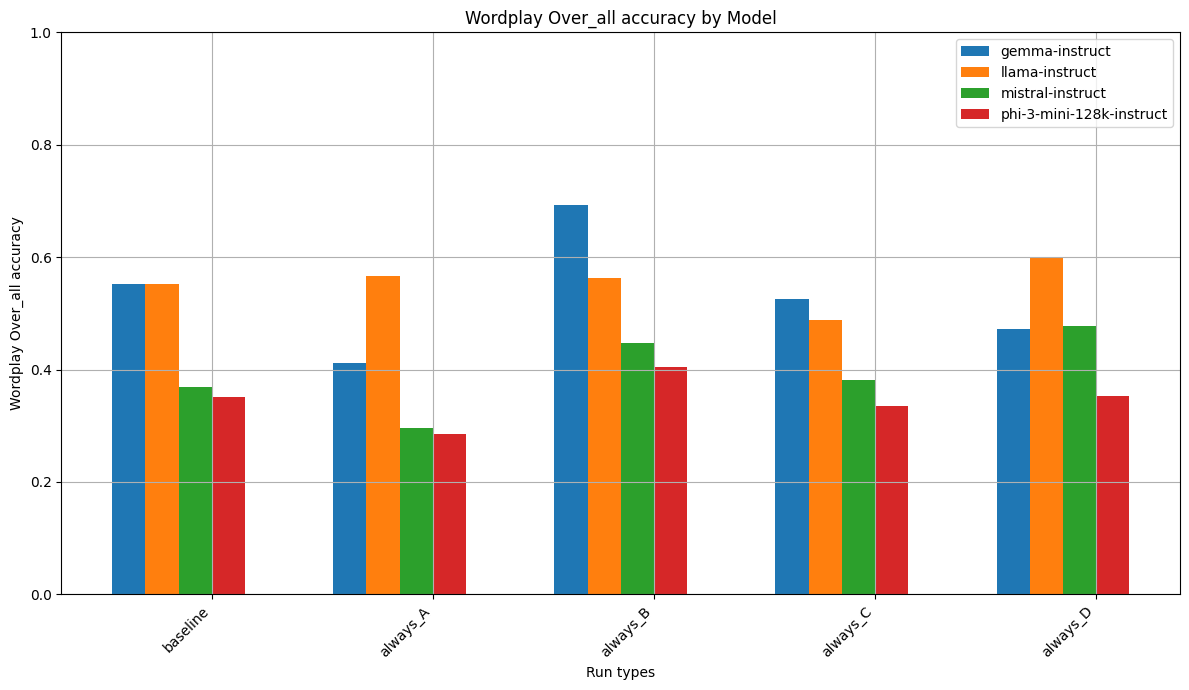

In [15]:
run_types = ["baseline", "always_A", "always_B", "always_C", "always_D"]

models = [
    "gemma-instruct",
    "llama-instruct",
    "mistral-instruct",
    "phi-3-mini-128k-instruct",
]

accuracy_type = 'over_all accuracy'
accuracy_type = 'original_accuracy'
accuracy_type = 'semantic_accuracy'
accuracy_type = 'context_accuracy'

# plot_accuracies(models, accuracy_group="all", accuracy_type='over_all accuracy', skip_spec=True)
# plot_accuracies(models, accuracy_group="sentence", accuracy_type='over_all accuracy', skip_spec=True)
plot_accuracies(models, accuracy_group="wordplay", accuracy_type='over_all accuracy', skip_spec=True)
